##### This is a tutorial copied by: 

https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/

### 1. Create the Dataset

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Random.seed() is used to call the same set of numbers
np.random.seed(42)

# Create Cat, Mouse and Dog Arrays (Each 700 x 2)
    # np.array([0,-3]) means that the center of the data will be between  x= 0 and y = -3
cat_image = np.random.randn(700,2) + np.array([0,-3])
mouse_images = np.random.randn(700,2) + np.array([3,3])
dog_images = np.random.randn(700,2) + np.array([-3,3])

In [62]:
## Vertically join the arrays to create the final dataset
feature_set = np.vstack([cat_image,mouse_images,dog_images])

In [63]:
## Create the corresponding labels for each record in the feature_set
# The below sctipt creates 2100 labels as 0,1,2(700 each)
labels = np.array([0]*700 + [1]*700 + [2]*700)

For our multiclass classification problem, we need to define the output label as one-hot encoding vector 

- Below code creates the one-hot encoded vector for our dataset

- It will have:
    - 1 at index 0 for the 1st 700, 
    - 1 at index 1 for the next 700 and 
    - 1 at index 2 for the last 700

In [64]:
one_hot_labels = np.zeros((2100,3))

for i in range(2100):
    one_hot_labels[i,labels[i]] = 1

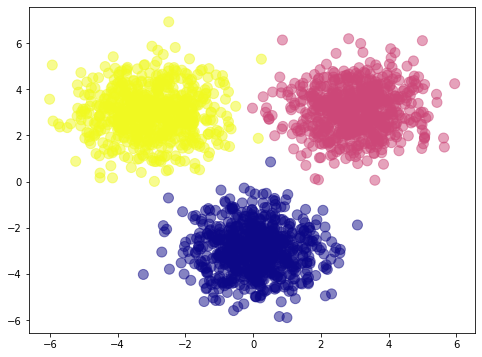

In [65]:
### Plot the dataset

plt.figure(figsize = (8,6))

plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

#### Softmax and Cross-Enthropy Functions

- Softmax is an activation function that is more efficient than the Logistic Regerssion we've used earlier 

- Cross-Enthropy function on the other hand is a loss function that is used in placed for MSE

In [66]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1-sigmoid(x))

In [67]:
### Softmax Activation Function 

def softmax(A):
    expA = np.exp(A)
    return expA/expA.sum()

nums = np.array([4,5,6])
print(softmax(nums))

[0.09003057 0.24472847 0.66524096]


In the script above we create a softmax function that takes a single vector as input, takes exponents of all the elements in the vector and then divides the resulting numbers individually by the sum of exponents of all the numbers in the input vector.

We can see that the input vector contains elements 4, 5 and 6. In the output, you will see three numbers squashed between 0 and 1 where the sum of the numbers will be equal to 1. 

In [68]:
instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 4
output_labels = 3

In [69]:
wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(output_labels)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)

lr = 10e-4

error_cost = []

for epoch in range(5000):
    
    #### Feedforward
    
    # Phase 01
    zh = np.dot(feature_set, wh) + bh
    ah = softmax(zh)
    
    # Phase 02
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)
    
    
    ######### Backpropagation 
    
    # phase 01
    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah
    
    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)
    

ValueError: operands could not be broadcast together with shapes (2100,4) (3,) 

In [54]:
print(wh.shape)

(2100, 4)


In [55]:
print(bh.shape)

(4,)


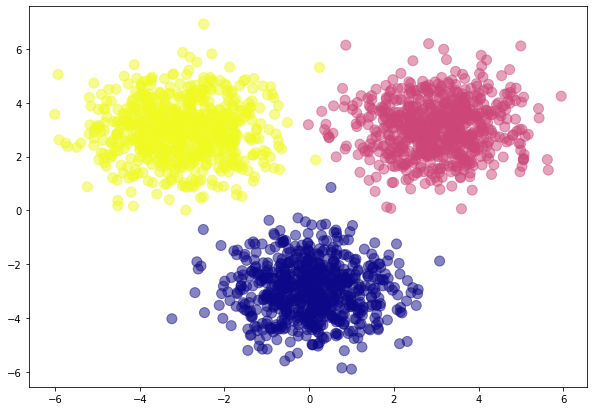

Loss function value:  3101.277959261377
Loss function value:  20.518567596960878
Loss function value:  13.41539643356695
Loss function value:  10.806239114192767
Loss function value:  9.29385304337065
Loss function value:  8.222335562342458
Loss function value:  7.427291388788856
Loss function value:  6.815957335510986
Loss function value:  6.3288007427772985
Loss function value:  5.929800342065819
Loss function value:  5.595779425599991
Loss function value:  5.311118805512472
Loss function value:  5.064894173306703
Loss function value:  4.849225960985247
Loss function value:  4.658281872646845
Loss function value:  4.487648995564463
Loss function value:  4.333924545010692
Loss function value:  4.194440988629735
Loss function value:  4.067076566158793
Loss function value:  3.950121680373944
Loss function value:  3.8421827888170195
Loss function value:  3.7421120397586796
Loss function value:  3.6489549384881395
Loss function value:  3.561910868828657
Loss function value:  3.48030292829

Loss function value:  0.676571071415611
Loss function value:  0.6728466698172135
Loss function value:  0.6691566029784577
Loss function value:  0.6655004408652807
Loss function value:  0.661877760144134
Loss function value:  0.6582881440564664
Loss function value:  0.6547311822959552
Loss function value:  0.6512064708885404
Loss function value:  0.6477136120750694
Loss function value:  0.6442522141965411
Loss function value:  0.6408218915819195
Loss function value:  0.6374222644383685
Loss function value:  0.6340529587438413
Loss function value:  0.6307136061421299
Loss function value:  0.6274038438400551
Loss function value:  0.6241233145069196
Loss function value:  0.6208716661761524
Loss function value:  0.6176485521490056
Loss function value:  0.6144536309003228
Loss function value:  0.6112865659862844
Loss function value:  0.6081470259541544
Loss function value:  0.6050346842538707
Loss function value:  0.6019492191514675
Loss function value:  0.5988903136443752
Loss function valu

In [59]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

cat_images = np.random.randn(700, 2) + np.array([0, -3])
mouse_images = np.random.randn(700, 2) + np.array([3, 3])
dog_images = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = np.vstack([cat_images, mouse_images, dog_images])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 4
output_labels = 3

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

error_cost = []

for epoch in range(50000):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)